#### **Problem Statement:** Based on certain attributes for an individual, the goal is to determine if a line of credit should be extended to them. If yes, what should be the repayment criteria for business recommendation.

In [2]:
#import libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings 
warnings.filterwarnings('ignore')

### Data dictionary:

### loan_amnt : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
### term : The number of payments on the loan. Values are in months and can be either 36 or 60.
### int_rate : Interest Rate on the loan
### installment : The monthly payment owed by the borrower if the loan originates.
### grade : LoanTap assigned loan grade
### sub_grade : LoanTap assigned loan subgrade
### emp_title :The job title supplied by the Borrower when applying for the loan.*
### emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
### home_ownership : The home ownership status provided by the borrower during registration or obtained from the credit report.
### annual_inc : The self-reported annual income provided by the borrower during registration.
### verification_status : Indicates if income was verified by LoanTap, not verified, or if the income source was verified
### issue_d : The month which the loan was funded
### loan_status : Current status of the loan - Target Variable
### purpose : A category provided by the borrower for the loan request.
### title : The loan title provided by the borrower
### dti : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LoanTap loan, divided by the borrower’s self-reported monthly income.
### earliest_cr_line :The month the borrower's earliest reported credit line was opened
### open_acc : The number of open credit lines in the borrower's credit file.
### pub_rec : Number of derogatory public records
### revol_bal : Total credit revolving balance
### revol_util : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
### total_acc : The total number of credit lines currently in the borrower's credit file
### initial_list_status : The initial listing status of the loan. Possible values are – W, F
### application_type : Indicates whether the loan is an individual application or a joint application with two co-borrowers
### mort_acc : Number of mortgage accounts.
### pub_rec_bankruptcies : Number of public record bankruptcies
### Address: Address of the individual

In [4]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/003/549/original/logistic_regression.csv?1651045921')
pd.pandas.set_option('display.max_columns', None)
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


## Exploritory Data Analysis

In [5]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [6]:
df.shape

(396030, 27)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [8]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [9]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [10]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [11]:
# there are only two type of loan status: Fully paid and Charged Off

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64


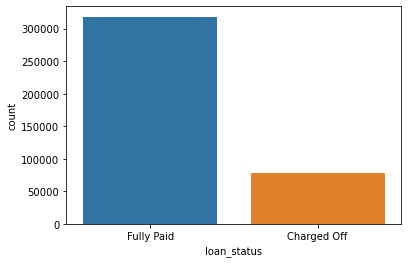

In [12]:
# Distribution of the Target column to check if the data is balanced or not. 

sns.countplot(df['loan_status'])

print(df['loan_status'].value_counts())

# This is a highly imbalanced dataset. This is a problem. Later on we will balance the dataset using SMOTE or any other balancing technique

In [13]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [14]:
# Dropping some of the irrelavent column.

df.drop(columns=['address'], axis= 1, inplace=True)

In [15]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0


In [16]:
#Removing extra space from each column
df.columns = df.columns.str.strip()

In [17]:
## Univariate Analysis

In [18]:
def plot_histogram(df):
    """ To Plot the histogram of the continuous feature"""
    print(df.describe())
    plt.figure(figsize=(10,6))
    plt.title(f'Datapoint distribution of {df.name}')
    sns.distplot(df,bins=30,kde=True,color='red')


def plot_countplot(df, n=100):
    """ To plot bargraph to get the count of each score feature"""
    print(df.describe())
    plt.figure(figsize=(10,6))
    plt.title(f'Datapoint distribution of {df.name}')
    sns.countplot(df, order=pd.value_counts(df).iloc[:n].index)


def plot_boxplot(x,y):
    """ To plot boxplot to get the distribution between target variable and other feature"""
    plt.figure(figsize=(10,6))
    plt.title(f'Datapoint distribution between {x.name} and {y.name}')
    sns.boxplot(x,y)


def plot_scatter(x,y):
    """ To plot boxplot to get the distribution between target variable and other feature"""
    plt.figure(figsize=(10,6))
    plt.title(f'Datapoint distribution between {x.name} and {y.name}')
    sns.scatterplot(x,y,color='green')


def plot_heatmap(df):
    """To plot the correaltion matrix to understand which feature is more related to target variable"""
    plt.figure(figsize=(10,6))
    plt.title(f'Correlation Matrix')
    sns.heatmap(df.corr(),annot=True)

count    396030.000000
mean      14113.888089
std        8357.441341
min         500.000000
25%        8000.000000
50%       12000.000000
75%       20000.000000
max       40000.000000
Name: loan_amnt, dtype: float64


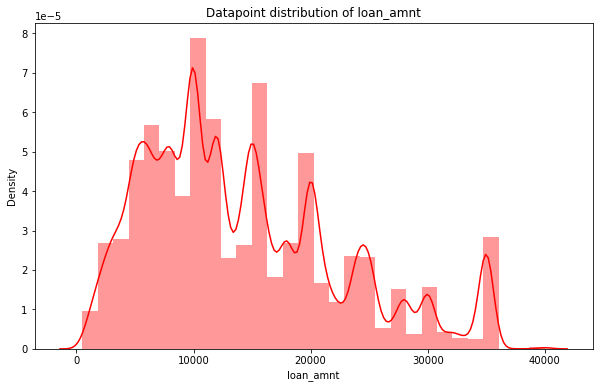

In [19]:
plot_histogram(df['loan_amnt'])

count    396030.000000
mean         13.639400
std           4.472157
min           5.320000
25%          10.490000
50%          13.330000
75%          16.490000
max          30.990000
Name: int_rate, dtype: float64


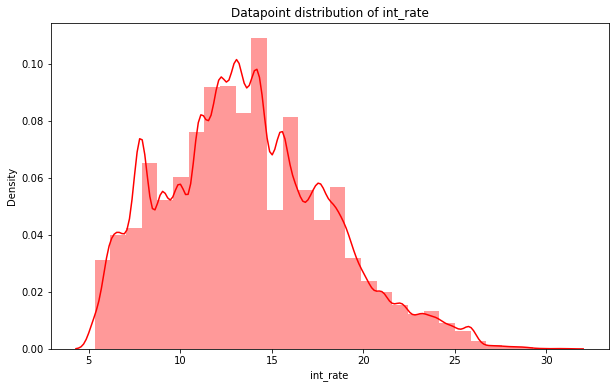

In [20]:
plot_histogram(df['int_rate'])

count         396030
unique             2
top        36 months
freq          302005
Name: term, dtype: object


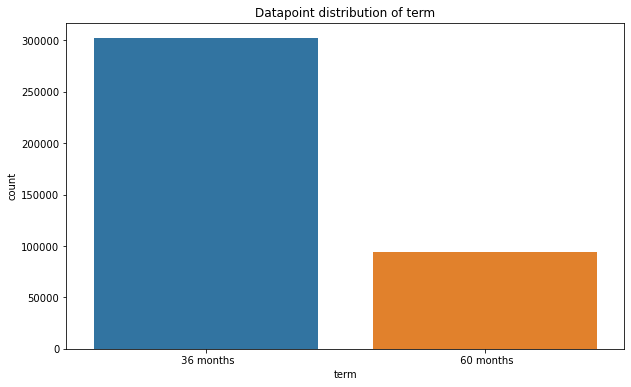

In [21]:
plot_countplot(df['term'])

count    396030.000000
mean        431.849698
std         250.727790
min          16.080000
25%         250.330000
50%         375.430000
75%         567.300000
max        1533.810000
Name: installment, dtype: float64


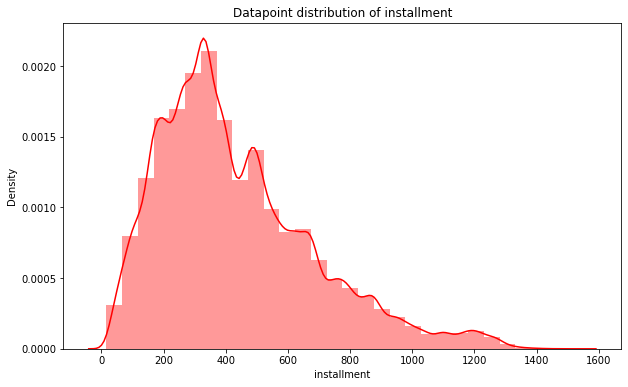

In [22]:
plot_histogram(df['installment'])

count     396030
unique         7
top            B
freq      116018
Name: grade, dtype: object


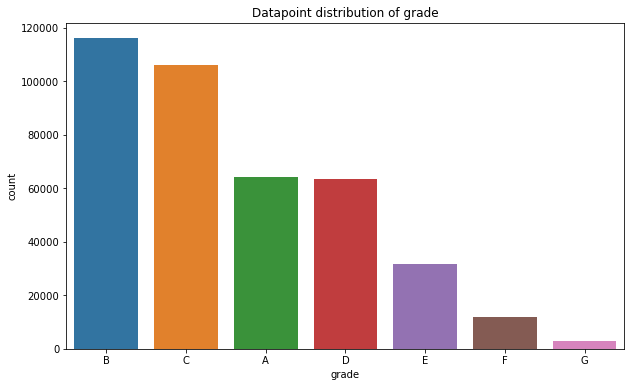

In [23]:
plot_countplot(df['grade'])

In [24]:
df['emp_title'].value_counts().head(10)

Teacher             4389
Manager             4250
Registered Nurse    1856
RN                  1846
Supervisor          1830
Sales               1638
Project Manager     1505
Owner               1410
Driver              1339
Office Manager      1218
Name: emp_title, dtype: int64

count      373103
unique     173105
top       Teacher
freq         4389
Name: emp_title, dtype: object


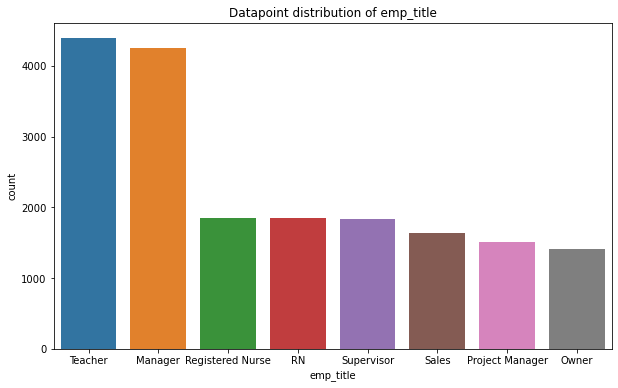

In [25]:
plot_countplot(df['emp_title'], n = 8)

count        377729
unique           11
top       10+ years
freq         126041
Name: emp_length, dtype: object


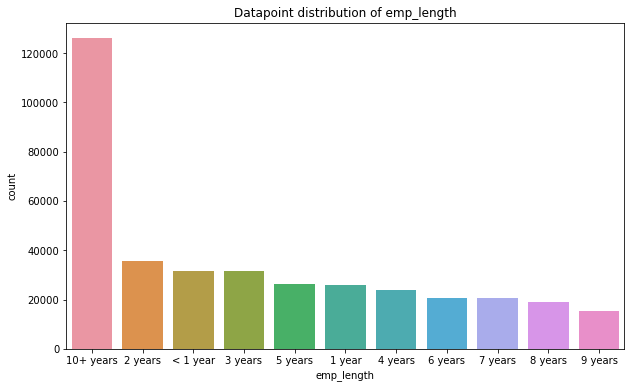

In [26]:
plot_countplot(df['emp_length'], n = 11)

count       396030
unique           6
top       MORTGAGE
freq        198348
Name: home_ownership, dtype: object


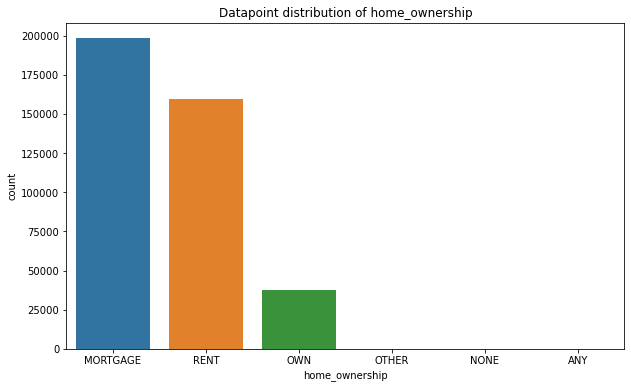

In [27]:
plot_countplot(df['home_ownership'])

count    3.960300e+05
mean     7.420318e+04
std      6.163762e+04
min      0.000000e+00
25%      4.500000e+04
50%      6.400000e+04
75%      9.000000e+04
max      8.706582e+06
Name: annual_inc, dtype: float64


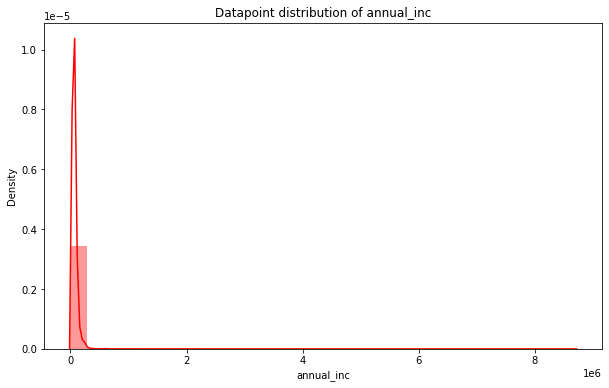

In [28]:
plot_histogram(df['annual_inc'])

count                 396030
unique                    14
top       debt_consolidation
freq                  234507
Name: purpose, dtype: object


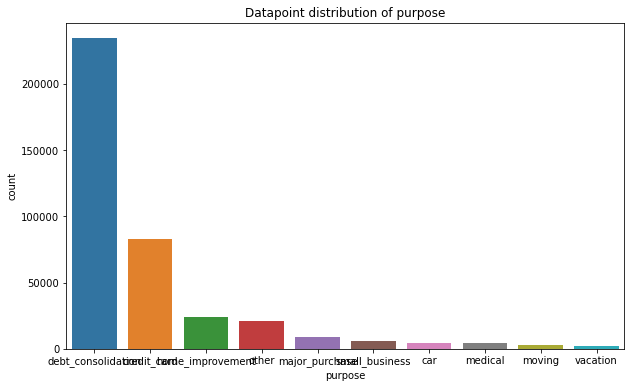

In [29]:
plot_countplot(df['purpose'], n = 10)

In [30]:
# Bivariate Analysis

In [31]:
df.head(2)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0


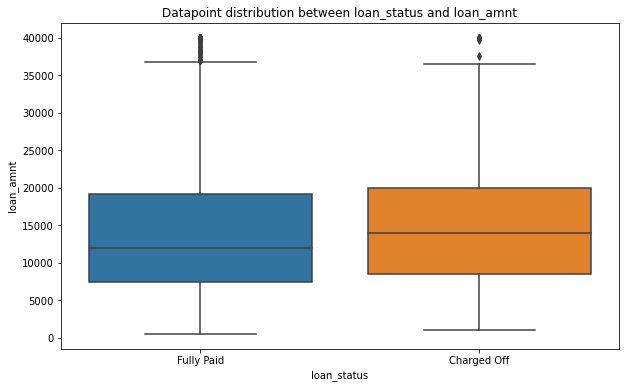

In [32]:
# How loan amount can decide the loan status?

plot_boxplot( df['loan_status'], df['loan_amnt'])

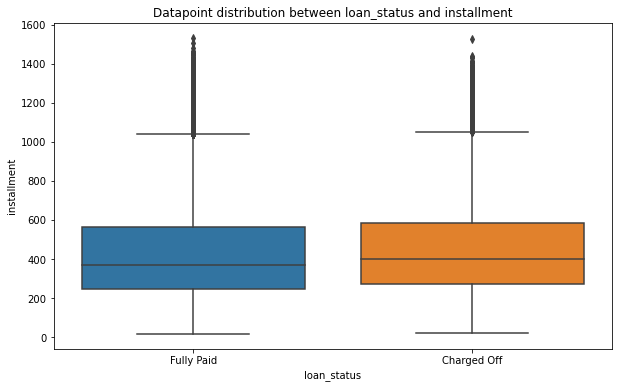

In [33]:
# How installment amount affects the target column?

plot_boxplot( df['loan_status'], df['installment'])

In [36]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0
